In [ ]:
# ToDo: 
# 1. https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html
# 2. https://www.kaggle.com/code/jeffd23/a-beginners-guide-to-time-series-forecasting 
# 3. https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
# 4. SkLearn getting Started: https://scikit-learn.org/1.5/getting_started.html
# 4. Regression: https://scikit-learn.org/stable/supervised_learning.html 

In [ ]:
# !pip install graphviz
# pip install graphviz

In [1]:
import pandas as pd
from category_encoders.target_encoder import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# 1-20: eigne values, 20-420: MO coff, one-hot eoncoding(last four columns)--421-spin, 422: os-state, 423: charge, 424-metal name,

In [7]:
# !pip install category_encoders
# !pip install xgboost

In [7]:
'''xls to csv '''
# def xls_to_csv(input_file, output_file):
#     # Read the Excel file
#     df = pd.read_excel(input_file)
#     # Write to CSV
#     df.to_csv(output_file, index=False)
# # Example usage:
# input_file = '424_columns_separated_dataset copy.xlsx'  # Provide the path to your Excel file
# output_file = 'dataset_energy_and_424.csv'  # Desired path for CSV output
# xls_to_csv(input_file, output_file)

'xls to csv '

In [11]:
# encoding the metal name
# co: -13.826014    395
# fe:  4.803402     390
# cr: -14.857336    220
# mn: 15.377689    210

# Read the CSV file
data = pd.read_csv('./converted_data.csv')  # Replace 'your_data.csv' with the path to your CSV file
data_sim = pd.read_csv('./simulated_data08.csv')  # Replace 'your_data.csv' with the path to your CSV file
# for col in data.select_dtypes(include='O').columns:
#     te=TargetEncoder()
#     data[col]=te.fit_transform(data[col], data.field1)
# data.head()
# data.to_csv('dataset_energy_and_424_encoded.csv', index=False)

In [12]:
# original data from sensor (ThinkSpeak)
data.head()

,time_stamp,entry_id,motor_temp,ambiant_temp,lin_X,lin_Y,lin_Z,current
0,2024-11-24T09:54:13Z,1758568,22.9375,23.3750,0.86910,0.51236,10.32859,-0.004
1,2024-11-24T09:54:31Z,1758569,22.8125,23.4375,0.86191,0.51236,10.35013,-0.004
2,2024-11-24T09:54:45Z,1758570,22.8750,23.4375,0.86431,0.51715,10.34056,-0.004
3,2024-11-24T09:55:20Z,1758571,22.8125,23.3750,0.86191,0.51236,10.35253,-0.004
4,2024-11-24T09:55:35Z,1758572,22.8750,23.4375,0.86431,0.51715,10.31901,-0.004


In [7]:
# simulated data ()
data_sim.head()


,Timestamp,MotorTemp,AmbientTemp,Current
0,13-Aug-2024 17:24:17,28.75,26.8125,0.87388
1,13-Aug-2024 17:24:32,28.75,26.8750,0.86670
2,13-Aug-2024 17:25:05,28.75,26.8125,0.86431
3,13-Aug-2024 17:25:20,28.75,26.8125,0.87388
4,13-Aug-2024 17:25:35,28.75,26.8125,0.86191


In [ ]:
# Drop the columns that are not needed
# columns anmes for the features
X_columns = ['field2','field3','field4','field5','field6'] #,'spin','metal','Ox','charge', 'at_sp_1','at_sp_2', 'at_sp_3', 'at_sp_4', 'at_sp_5', 'at_sp_6', 'at_sp_7', 'at_sp_8', 'at_sp_9', 'at_sp_10', 'NPA_1', 'NPA_2', 'NPA__3', 'NPA_4', 'NPA_5', 'NPA_6', 'NPA_7','0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20', '21','22','23','24','25','26','27','28','29','30', '31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50'] #,,'51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80','81','82','83','84','85','86','87','88','89','90','91','92','93','94','95','96','97','98','99','100','101','102','103','104','105','106','107','108','109','110','111','112','113','114','115','116','117','118','119','120','121','122','123','124','125','126','127','128','129','130','131','132','133','134','135','136','137','138','139','140','141','142','143','144','145','146','147','148','149','150','151','152','153','154','155','156','157','158','159','160','161','162','163','164','165','166','167','168','169','170','171','172','173','174','175','176','177','178','179','180','181','182','183','184','185','186','187','188','189','190','191','192','193','194','195','196','197','198','199','200','201','202','203','204','205','206','207','208','209','210','211','212','213','214','215','216','217','218','219','220','221','222','223','224','225','226','227','228','229','230','231','232','233','234','235','236','237','238','239','240','241','242','243','244','245','246','247','248','249','250','251','252','253','254','255','256','257','258','259','260','261','262','263','264','265','266','267','268','269','270','271','272','273','274','275','276','277','278','279','280','281','282','283','284','285','286','287','288','289','290','291','292','293','294','295','296','297','298','299','300','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','319','320','321','322','323','324','325','326','327','328','329','330','331','332','333','334','335','336','337','338','339','340','341','342','343','344','345','346','347','348','349','350','351','352','353','354','355','356','357','358','359','360','361','362','363','364','365','366','367','368','369','370','371','372','373','374','375','376','377','378','379','380','381','382','383','384','385','386','387','388','389','390','391','392','393','394','395','396','397','398','399','400','401','402','403','404','405','406','407','408','409','410','411','412','413','414','415','416','417','418','419']  # Features
y_column = 'field1' # Target values
# metal	Ox	spin	charge	eq1	eq2	eq3	eq4	ax1	ax2	SSE	at_sp_1	at_sp_2	at_sp_3	at_sp_4	at_sp_5	at_sp_6	at_sp_7	at_sp_8	at_sp_9	at_sp_10	NPA_1	NPA_2	NPA__3	NPA_4	NPA_5	NPA_6	NPA_7

X = data[X_columns].values  # Features
y = data[y_column].values    # Target values
# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(X_train)
# data['metal'].value_counts()
print("Training data:")
print('train data len:', len(y_train), len(X_train))
print('test data len:', len(y_test), len(X_test))
# print("Test data:")
# print(y_test)

Training data:
train len: 80 80
test data: 20 20


In [11]:
''' Lasso Regression with two degree Polynomial Features '''
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate sample data
# X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Lasso regression model

lasso_reg = make_pipeline(StandardScaler(), Lasso(alpha=0.01, random_state=42))

# Fit the model to the polynomial features
lasso_reg.fit(X_train_poly, y_train)

# Make predictions
pred_lasso2 = lasso_reg.predict(X_test_poly)

# Evaluate the model
mse_lasso2 = mean_squared_error(y_test, pred_lasso2)
mae_lasso2 = mean_absolute_error(y_test, pred_lasso2)
r2_lasso2 = r2_score(y_test, pred_lasso2)
print("Mean Squared Error:", mse_lasso2)
print("Mean Absolute Error:", mae_lasso2)
print("R-squared score:", r2_lasso2)

Mean Squared Error: 0.000898437499999991
Mean Absolute Error: 0.029374999999999575
R-squared score: -0.010989010989000958


In [12]:
''' Multi Layer Perceptron (MLP) Regressor '''
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load sample data

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(300, 200, 100, 30), activation='relu', solver='sgd', max_iter=250, random_state=42)
# mlp_reg = MLPRegressor(hidden_layer_sizes=(50, 50, 20), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train the model
mlp_reg.fit(X_train_scaled, y_train)

# Make predictions
mlp_pred = mlp_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, mlp_pred)
mae = mean_absolute_error(y_test, mlp_pred)
r2 = r2_score(y_test, mlp_pred)

print("MLP Regression MSE:", mse)
print("MLP Regression MAE:", mae)
print("MLP Regression R-squared score:", r2)

''' # BEST MODEL output for MLP '''
# MLP Regression MSE: 60.22158227526133
# MLP Regression MAE: 5.823192268104731
# MLP Regression R-squared score: 0.8386276321632771

MLP Regression MSE: 0.02698254812173555
MLP Regression MAE: 0.12999985393173538
MLP Regression R-squared score: -42.17207699477688


' # BEST MODEL output for MLP '

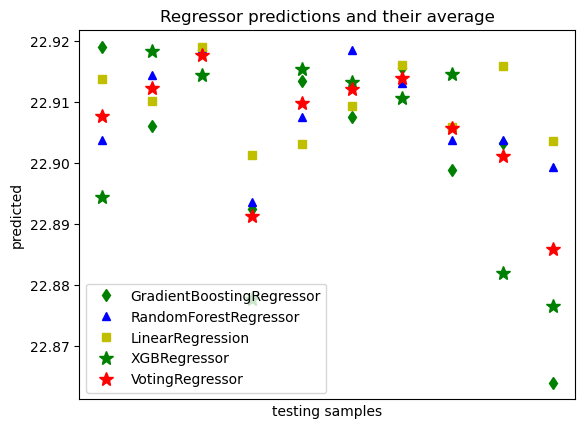

Mean Squared Error for GradientBoostingRegressor: 0.001163028728940144
Mean Squared Error for RandomForestRegressor: 0.0007644815646701603
Mean Squared Error for LinearRegression: 0.0008587796086768285
Mean Squared Error for XGBRegressor: 0.0008832197589072166
Mean Squared Error for VotingRegressor: 0.0008492538965517618
Mean Absolute Error for GradientBoostingRegressor: 0.03023085098981646
Mean Absolute Error for RandomForestRegressor: 0.026821875000000262
Mean Absolute Error for LinearRegression: 0.028599474080109034
Mean Absolute Error for XGBRegressor: 0.02517566680908203
Mean Absolute Error for VotingRegressor: 0.02770696671975159
R-squared score for GradientBoostingRegressor: -0.8608459663042303
R-squared score for RandomForestRegressor: -0.22317050347225642
R-squared score for LinearRegression: -0.3740473738829255
R-squared score for XGBRegressor: -0.41315161425154656
R-squared score for VotingRegressor: -0.3588062344828189


In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,)
from sklearn.linear_model import LinearRegression

''' Plot individual and voting regression predictions 
    Compare the performance of different regressors on the diabetes dataset 
    and 
    XGBooster Regressor,
    VotingRegressor. 
'''

# Train classifiers
reg1 = GradientBoostingRegressor(random_state=2)
reg2 = RandomForestRegressor(random_state=2)
reg3 = LinearRegression()

n_iterations = 200 # number of iterations
xgb_reg = xgb.XGBRegressor(n_estimators=n_iterations, objective='reg:squarederror', random_state=42)

# training the models
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train)


# combine the models and train the VotingRegressor, Second best model 
ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3), ("xgb", xgb_reg)])
ereg.fit(X_train, y_train)

# test the models
pred1 = reg1.predict(X_test)         # GradientBoostingRegressor
pred2 = reg2.predict(X_test)         # RandomForestRegressor
pred3 = reg3.predict(X_test)         # LinearRegression
pred_xgb = xgb_reg.predict(X_test)   # XGBRegressor
pred4 = ereg.predict(X_test)         # VotingRegressor

# Plot the results
plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred_xgb, "g*", ms=10, label="XGBRegressor")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("testing samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")
plt.show()

# calculate the mean squared error
mse_gb = mean_squared_error(y_test, pred1) 
mse_rf = mean_squared_error(y_test, pred2)
mse_lr = mean_squared_error(y_test, pred3)
mse_xgb = mean_squared_error(y_test, pred_xgb)
mse_vr = mean_squared_error(y_test, pred4)
print(f"Mean Squared Error for GradientBoostingRegressor: {mse_gb}")
print(f"Mean Squared Error for RandomForestRegressor: {mse_rf}")
print(f"Mean Squared Error for LinearRegression: {mse_lr}")
print(f"Mean Squared Error for XGBRegressor: {mse_xgb}")
print(f"Mean Squared Error for VotingRegressor: {mse_vr}")

# calculate the mean absolute error
mae_gb = mean_absolute_error(y_test, pred1)
mae_rf = mean_absolute_error(y_test, pred2)
mae_lr = mean_absolute_error(y_test, pred3)
mae_xgb = mean_absolute_error(y_test, pred_xgb)
mae_vr = mean_absolute_error(y_test, pred4)

print(f"Mean Absolute Error for GradientBoostingRegressor: {mae_gb}")
print(f"Mean Absolute Error for RandomForestRegressor: {mae_rf}")
print(f"Mean Absolute Error for LinearRegression: {mae_lr}")
print(f"Mean Absolute Error for XGBRegressor: {mae_xgb}")
print(f"Mean Absolute Error for VotingRegressor: {mae_vr}")

# calculate the r-squared score
r2_gb = r2_score(y_test, pred1)
r2_rf = r2_score(y_test, pred2)
r2_lr = r2_score(y_test, pred3)
r2_xgb = r2_score(y_test, pred_xgb)
r2_vr = r2_score(y_test, pred4)

print(f"R-squared score for GradientBoostingRegressor: {r2_gb}")
print(f"R-squared score for RandomForestRegressor: {r2_rf}")
print(f"R-squared score for LinearRegression: {r2_lr}")
print(f"R-squared score for XGBRegressor: {r2_xgb}")
print(f"R-squared score for VotingRegressor: {r2_vr}")

In [14]:
''' Linear Regression, Ridge Regression , Lasso Regression, SGD Regressor 
    Gaussian Process Regression,
    ElasticNet Regression,
    Decision Tree Regression, SVR 
'''
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_squared_error


# Generate sample data
# X_train, y_train, X_test, y_test


# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed
lasso_reg.fit(X_train, y_train)

# Ridge Regression
ridge_reg = Ridge(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed
ridge_reg.fit(X_train, y_train)

# ElasticNet Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can adjust the regularization strength (alpha) and the ratio between L1 and L2 penalties (l1_ratio) as needed
elastic_net.fit(X_train, y_train)

# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(max_depth=5)  # You can adjust the maximum depth of the tree as needed
decision_tree_reg.fit(X_train, y_train)

# Support Vector Regression (SVR)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.2)  # You can adjust the kernel, regularization parameter (C), and epsilon as needed
svr.fit(X_train, y_train)

# Gaussian Process Regression
kernel = RBF(length_scale=1.0)  # You can adjust the length scale of the RBF kernel as needed
gp_reg = GaussianProcessRegressor(kernel=kernel, random_state=42)
gp_reg.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg.predict(X_test)
lasso_reg_predictions = lasso_reg.predict(X_test)
ridge_reg_predictions = ridge_reg.predict(X_test)
elastic_net_predictions = elastic_net.predict(X_test)
decision_tree_predictions = decision_tree_reg.predict(X_test)
svr_predictions = svr.predict(X_test)
gp_reg_predictions, gp_reg_std = gp_reg.predict(X_test, return_std=True)

/home/naagar/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [15]:
# Evaluate models, mes: mean squared error
print("Linear Regression MSE:                 ", mean_squared_error(y_test, linear_reg_predictions))
print("Lasso Regression MSE:                  ", mean_squared_error(y_test, lasso_reg_predictions))
print("Ridge Regression MSE:                  ", mean_squared_error(y_test, ridge_reg_predictions))
print("ElasticNet Regression MSE:             ", mean_squared_error(y_test, elastic_net_predictions))
print("Decision Tree Regression MSE:          ", mean_squared_error(y_test, decision_tree_predictions))
print("SVR MSE:                               ", mean_squared_error(y_test, svr_predictions))
print("Gaussian Process Regression MSE:       ", mean_squared_error(y_test, gp_reg_predictions))
print("Voting Regressor MSE:                  ", mean_squared_error(y_test, pred4))
print("MLP MSE:                               ", mean_squared_error(y_test, mlp_pred))
print("XGB Regressor MSE:                     ", mean_squared_error(y_test, pred_xgb))

# evaluate the models, mae: mean absolute error
print("Linear Regression MAE:            ", mean_absolute_error(y_test, linear_reg_predictions))
print("Lasso Regression MAE:             ", mean_absolute_error(y_test, lasso_reg_predictions))
print("Ridge Regression MAE:             ", mean_absolute_error(y_test, ridge_reg_predictions))
print("ElasticNet Regression MAE:        ", mean_absolute_error(y_test, elastic_net_predictions))
print("Decision Tree Regression MAE:     ", mean_absolute_error(y_test, decision_tree_predictions))
print("SVR MAE:                          ", mean_absolute_error(y_test, svr_predictions))
print("Gaussian Process Regression MAE:  ", mean_absolute_error(y_test, gp_reg_predictions))
print("Voting Regressor MAE:             ", mean_absolute_error(y_test, pred4))
print("MLP MAE:                          ", mean_absolute_error(y_test, mlp_pred))
print("XGB Regressor MAE:                ", mean_absolute_error(y_test, pred_xgb))

# evaluate the models, r2: r-squared score
print("Linear Regression R-squared score:           ", r2_score(y_test, linear_reg_predictions))
print("Lasso Regression R-squared score:            ", r2_score(y_test, lasso_reg_predictions))
print("Ridge Regression R-squared score:            ", r2_score(y_test, ridge_reg_predictions))
print("ElasticNet Regression R-squared score:       ", r2_score(y_test, elastic_net_predictions))
print("Decision Tree Regression R-squared score:    ", r2_score(y_test, decision_tree_predictions))
print("SVR R-squared score:                         ", r2_score(y_test, svr_predictions))
print("Gaussian Process Regression R-squared score: ", r2_score(y_test, gp_reg_predictions))
print("Voting Regressor R-squared score:            ", r2_score(y_test, pred4))
print("MLP R-squared score:                         ", r2_score(y_test, mlp_pred))
print("XGB Regressor R-squared score:               ", r2_score(y_test, pred_xgb))

Linear Regression MSE:                  0.0008587796086768285
Lasso Regression MSE:                   0.0007990933641975079
Ridge Regression MSE:                   0.0008015082069550764
ElasticNet Regression MSE:              0.0007990933641975079
Decision Tree Regression MSE:           0.0008704232784566054
SVR MSE:                                0.003125
Gaussian Process Regression MSE:        525.55625
Voting Regressor MSE:                   0.0008492538965517618
MLP MSE:                                0.02698254812173555
XGB Regressor MSE:                      0.0008832197589072166
Linear Regression MAE:             0.028599474080109034
Lasso Regression MAE:              0.027916666666666146
Ridge Regression MAE:              0.027971940923039895
ElasticNet Regression MAE:         0.027916666666666146
Decision Tree Regression MAE:      0.028844975490196136
SVR MAE:                           0.05
Gaussian Process Regression MAE:   22.925
Voting Regressor MAE:              0.02770696

In [16]:
# save the predictions and the actual values for all the models in a csv file
# Create a DataFrame with the actual values and the predictions
results = pd.DataFrame({'Linear Regression': linear_reg_predictions, 'Lasso Regression': lasso_reg_predictions, 'Ridge Regression': ridge_reg_predictions, 'ElasticNet Regression': elastic_net_predictions, 'Decision Tree Regression': decision_tree_predictions, 'SVR': svr_predictions, 'Gaussian Process Regression': gp_reg_predictions, 'Voting Regressor': pred4, 'MLP': mlp_pred, 'XGB Regressor': pred_xgb,'Actual SSE': y_test})
results.to_csv('regression_results_all_models_for_ALL_FOUR_features.csv', index=False)


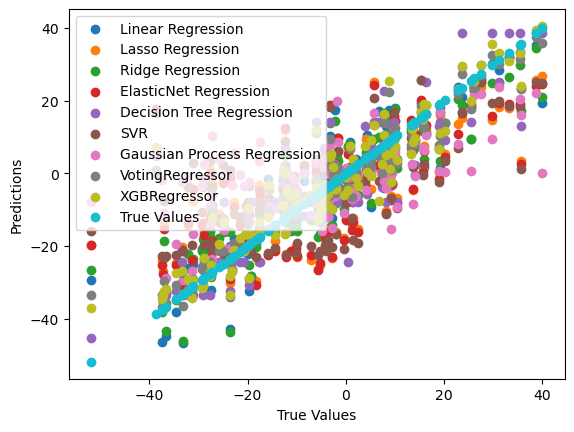

In [22]:
# Plot the results, 
''' Best is Gaussian Process Regression'''
plt.figure()
plt.scatter(y_test, linear_reg_predictions, label="Linear Regression")
plt.scatter(y_test, lasso_reg_predictions, label="Lasso Regression")
plt.scatter(y_test, ridge_reg_predictions, label="Ridge Regression")
plt.scatter(y_test, elastic_net_predictions, label="ElasticNet Regression")
plt.scatter(y_test, decision_tree_predictions, label="Decision Tree Regression")
plt.scatter(y_test, svr_predictions, label="SVR")
plt.scatter(y_test, gp_reg_predictions, label="Gaussian Process Regression")
plt.scatter(y_test, pred4, label="VotingRegressor")
plt.scatter(y_test, pred_xgb, label="XGBRegressor")
plt.scatter(y_test, y_test, label="True Values")

plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()
plt.show()

In [17]:
''' Multi Layer Perceptron (MLP) Regressor '''
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load sample data

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes=(300, 200, 100, 50), activation='relu', solver='sgd', max_iter=250, random_state=42)

# Train the model
mlp_reg.fit(X_train_scaled, y_train)

# Make predictions
predictions = mlp_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("MLP Regression MSE:", mse)
print("MLP Regression MAE:", mae)
print("MLP Regression R-squared score:", r2)

MLP Regression MSE: 0.045014948144595265
MLP Regression MAE: 0.17224230998582649
MLP Regression R-squared score: -71.02391703135241


In [18]:
''' Ridge Regression '''
''' Lasso Regression '''
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, SGDRegressor, LassoCV

scaler = StandardScaler()
scaler.fit(X_train)
X_s_train = scaler.transform(X_train)
X_s_test = scaler.transform(X_test)

lasso = Lasso()
lasso.fit(X_train, y_train)

# make pipeline
pipeline = make_pipeline(StandardScaler(), Lasso())
pipeline.fit(X_train, y_train)
pred_lasso = pipeline.predict(X_test)

mse = mean_squared_error(y_test, pred_lasso)
print(f"Mean Squared Error on test data: {mse}")
mae = mean_absolute_error(y_test, pred_lasso)
print(f"Mean Absolute Error on test data: {mae}")
r2 = r2_score(y_test, pred_lasso)
print(f"R-squared score on test data: {r2}")
# print(pipeline[1].coef_[0], pipeline[1].intercept_)

# SGD regressor
pipeline_sgd = make_pipeline(StandardScaler(), SGDRegressor(alpha=1, penalty="l1"))
pipeline_sgd.fit(X_train, y_train)
pred_sgd_std = pipeline_sgd.predict(X_test)

mse = mean_squared_error(y_test, pred_sgd_std)
print(f"Mean Squared Error on test data: {mse}")
mae = mean_absolute_error(y_test, pred_sgd_std)
print(f"Mean Absolute Error on test data: {mae}")
r2 = r2_score(y_test, pred_sgd_std)
print(f"R-squared score on test data: {r2}")

# print(pipeline_sgd[1].coef_[0], pipeline_sgd[1].intercept_)

# finding the optimal alpha
lasso_cv_pipeline = make_pipeline(StandardScaler(),
                                  LassoCV(alphas=[0.1, 1.0, 10]))
lasso_cv_pipeline.fit(X_train, y_train)
pred_lasso_cv = lasso_cv_pipeline.predict(X_test)

mse = mean_squared_error(y_test, pred_lasso_cv)
print(f"Mean Squared Error on test data: {mse}")
mae = mean_absolute_error(y_test, pred_lasso_cv)
print(f"Mean Absolute Error on test data: {mae}")
r2 = r2_score(y_test, pred_lasso_cv)
print(f"R-squared score on test data: {r2}")
# print(lasso_cv_pipeline[1].alpha_)
# output: 0.1

Mean Squared Error on test data: 0.0007990933641975079
Mean Absolute Error on test data: 0.027916666666666146
R-squared score on test data: -0.2785493827160126
Mean Squared Error on test data: 0.00421048894329351
Mean Absolute Error on test data: 0.05987895242314707
R-squared score on test data: -5.736782309269616
Mean Squared Error on test data: 0.0007990933641975079
Mean Absolute Error on test data: 0.027916666666666146
R-squared score on test data: -0.2785493827160126


In [20]:
'''apply PCA and SGD Regressor'''
import numpy as np
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate sample data
# X, y = make_regression(n_samples=100, n_features=50, noise=0.1, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=3) # n_components is the number of components to keep
X_pca = pca.fit_transform(X_train)

# Initialize the SGDRegressor with L1 penalty
sgd = SGDRegressor(penalty='l1', max_iter=100, tol=1e-3)

# Scale the data and apply SGDRegressor
model = make_pipeline(StandardScaler(), sgd)

# Fit the model to the PCA-transformed data
model.fit(X_pca, y_train)

# Optionally, you can transform new data using the same PCA object and make predictions
# For example, if you have X_test, you can do:
X_test_pca = pca.transform(X_test)
predictions = model.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on test data: {mse}")
mean_absolute_error_ = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error on test data: {mean_absolute_error_}")
r2_score_ = r2_score(y_test, predictions)
print(f"R-squared score on test data: {r2_score_}")

Mean Squared Error on test data: 0.00416754031303199
Mean Absolute Error on test data: 0.05945270334815724
R-squared score on test data: -5.668064500851184


In [26]:
''' Lasso Regression with SGD '''

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Generate sample data
# X, y = make_regression(n_samples=100, n_features=50, noise=0.1, random_state=42)

# Initialize the Lasso Regression model with SGD
lasso_sgd = make_pipeline(StandardScaler(), SGDRegressor(penalty='l1', max_iter=1000, tol=1e-3))

# Fit the model to the data
lasso_sgd.fit(X_train, y_train)

# Optionally, you can make predictions
# For example, if you have X_test, you can do:
predictions = lasso_sgd.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on test data: {mse}")
mean_absolute_error_ = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error on test data: {mean_absolute_error_}")
r2_score_ = r2_score(y_test, predictions)
print(f"R-squared score on test data: {r2_score_}")

Mean Squared Error on test data: 120.22794921300866
Mean Absolute Error on test data: 8.686511155651345
R-squared score on test data: 0.6778319646937194


/home/naagar/anaconda3/lib/python3.12/site-packages/sklearn/gaussian_process/_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Mean Squared Error on test data: 2.8152599584306524
Mean Absolute Error on test data: 1.0832578779266988
R-squared score on test data: -4503.415933489044


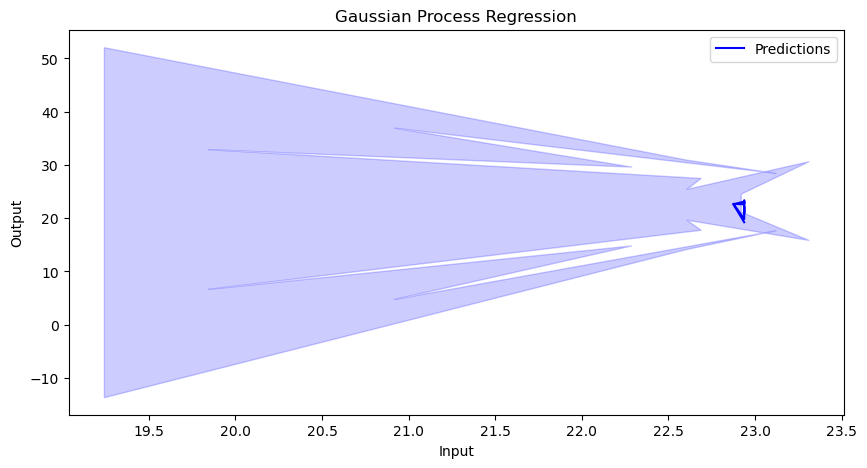

In [21]:
''' Gaussian Process Regression '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define kernel
kernel = C(2.0, (1e-3, 1e3)) * RBF(0.5, (1e-2, 1e2))

# Initialize Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=3)

# Fit the model to the data
gp.fit(X_train, y_train)

# Make predictions
# x_pred = np.linspace(0, 5, 100)[:, None]
y_pred, sigma = gp.predict(X_test, return_std=True)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error on test data: {mae}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared score on test data: {r2}")


# Plot the results
plt.figure(figsize=(10, 5))
# plt.scatter(X_test, y_test, c='r', label='Data')
plt.plot(y_test, y_pred, 'b-', label='Predictions')
plt.fill_between(y_pred.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, alpha=0.2, color='blue')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Gaussian Process Regression')
plt.legend()
plt.show()

In [22]:
# Initialize the linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test data
predictions = model.predict(X_test)
print("Predictions on test data:")
# for i, pred in enumerate(predictions):
#     print(f"Prediction for X_test[{i}]: {pred}")
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"\nMean Squared Error on test data: {mse}")
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error on test data: {mae}")
r2 = r2_score(y_test, predictions)
print(f"R-squared score on test data: {r2}")

Predictions on test data:

Mean Squared Error on test data: 0.0008587796086768285
Mean Absolute Error on test data: 0.028599474080109034
R-squared score on test data: -0.3740473738829255


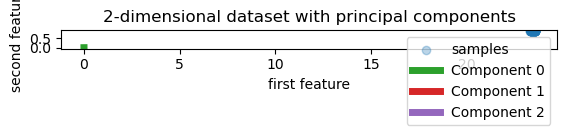

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

# rng = np.random.RandomState(0)
# n_samples = 500
# cov = [[3, 3], [3, 4]]
# X = rng.multivariate_normal(mean=[0, 0], cov=cov, size=n_samples)
pca = PCA(n_components=3).fit(X_train)

plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    aspect="equal",
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()

In [25]:
''' Lasso Regression with two degree Polynomial Features '''
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate sample data
# X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Lasso regression model
lasso_reg = make_pipeline(StandardScaler(), Lasso(alpha=0.01, random_state=42))

# Fit the model to the polynomial features
lasso_reg.fit(X_train_poly, y_train)

# Make predictions
pred_lasso2 = lasso_reg.predict(X_test_poly)

# Evaluate the model
mse_lasso2 = mean_squared_error(y_test, pred_lasso2)
mae_lasso2 = mean_absolute_error(y_test, pred_lasso2)
r2_lasso2 = r2_score(y_test, pred_lasso2)
print("Mean Squared Error:", mse_lasso2)
print("Mean Absolute Error:", mae_lasso2)
print("R-squared score:", r2_lasso2)

Mean Squared Error: 0.0007990933641975079
Mean Absolute Error: 0.027916666666666146
R-squared score: -0.2785493827160126


In [26]:
''' Lasso Regression with two degree Polynomial Features '''
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate sample data
# X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize Lasso regression model
lasso_reg = make_pipeline(StandardScaler(), Lasso(alpha=0.01, random_state=42))

# Fit the model to the polynomial features
lasso_reg.fit(X_train_poly, y_train)

# Make predictions
pred_lasso2 = lasso_reg.predict(X_test_poly)

# Evaluate the model
mse_lasso2 = mean_squared_error(y_test, pred_lasso2)
mae_lasso2 = mean_absolute_error(y_test, pred_lasso2)
r2_lasso2 = r2_score(y_test, pred_lasso2)
print("Lasso-2, Mean Squared Error:", mse_lasso2)
print("Lasso-2, Mean Absolute Error:", mae_lasso2)
print("Lasso-2, R-squared score:", r2_lasso2)

Lasso-2, Mean Squared Error: 0.0007990933641975079
Lasso-2, Mean Absolute Error: 0.027916666666666146
Lasso-2, R-squared score: -0.2785493827160126


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 378.3 kB/s eta 0:00:000:00:01


# Analysis of test data

In [31]:
# 
# plt.scatter(y_test, pred_xgb, label="XGBRegressor")
print('ground truth (True temprature)\n',y_test[0:20]) 
print('Predicted (pred temprature)', pred_xgb[0:20])


ground truth (True temprature)
 [22.9375 22.9375 22.9375 22.875  22.9375 22.9375 22.9375 22.9375 22.875
 22.9375]
Predicted (pred temprature) [22.894377 22.918442 22.914417 22.87777  22.915451 22.913311 22.910692
 22.9147   22.881962 22.876585]


## Scatter Plot

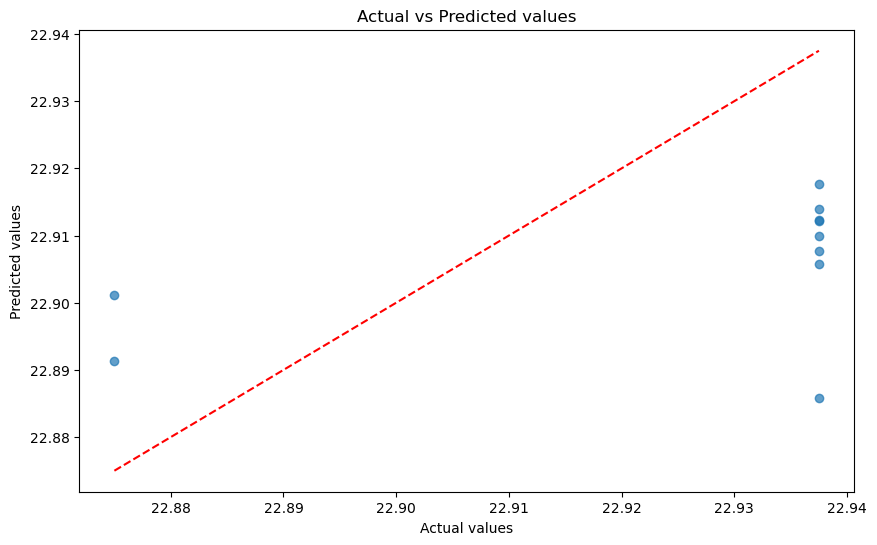

<Figure size 640x480 with 0 Axes>

In [32]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


# Scatter plot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred4, alpha=0.7)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.show()
plt.savefig('decision_tree_regression_.png')

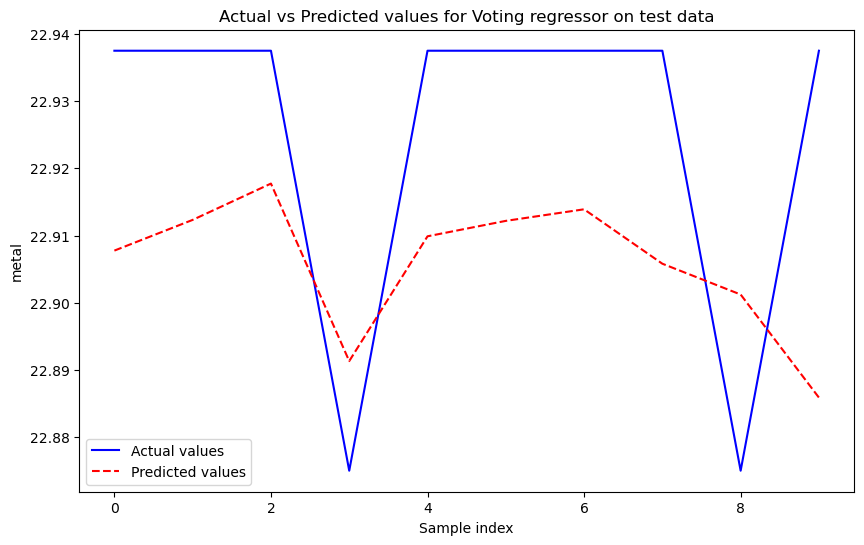

In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


# Line plot for actual vs predicted values without sorting
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual values', color='blue')
plt.plot(range(len(y_test)), pred4, label='Predicted values', color='red', linestyle='--')
plt.xlabel('Sample index')
plt.ylabel('metal')
plt.title('Actual vs Predicted values for Voting regressor on test data')
plt.legend()
plt.show()


## Residual Plot

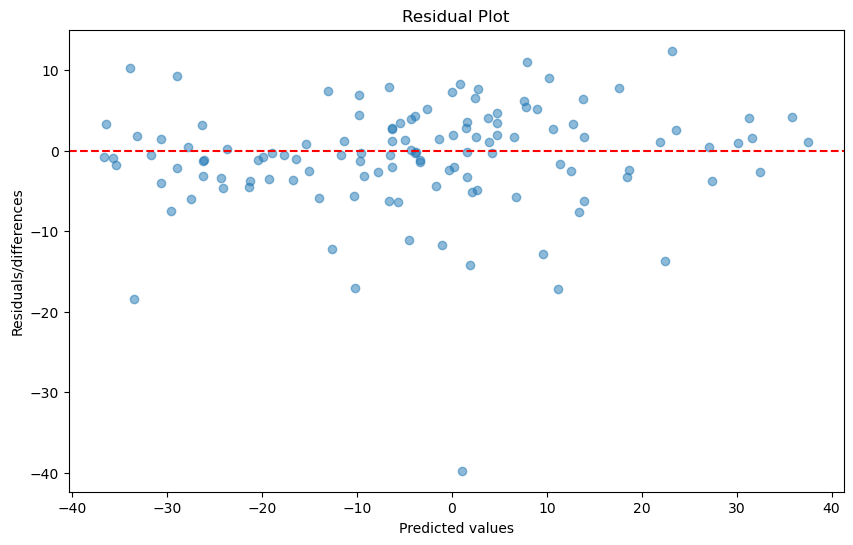

In [37]:
# Calculate residuals, residual = actual - predicted
residuals = y_test - pred4
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(pred4, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals/differences')
plt.title('Residual Plot')
plt.show()

## Distribution Plot

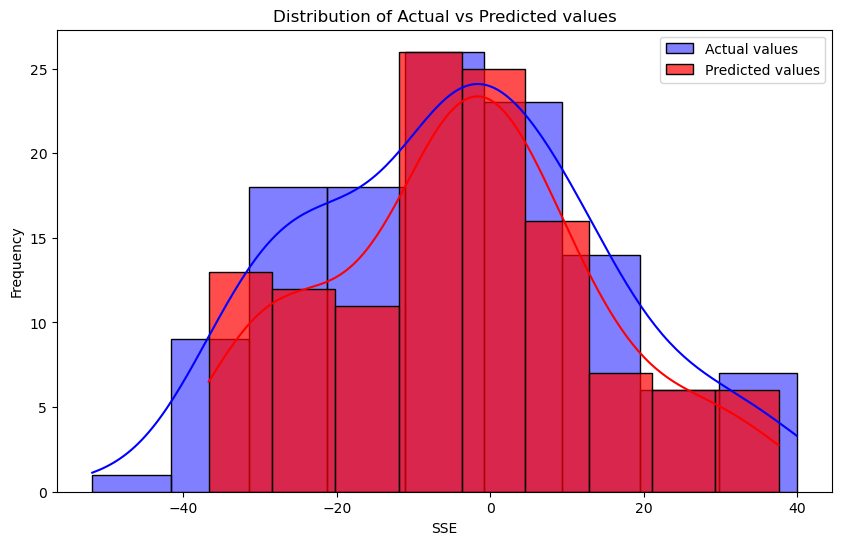

In [38]:
import seaborn as sns

# Distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', kde=True, label='Actual values')
sns.histplot(pred4, color='red', kde=True, label='Predicted values', alpha=0.7)
plt.xlabel('SSE')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs Predicted values')
plt.legend()
plt.show()


## Cumulative Distribution Function (CDF) Plot

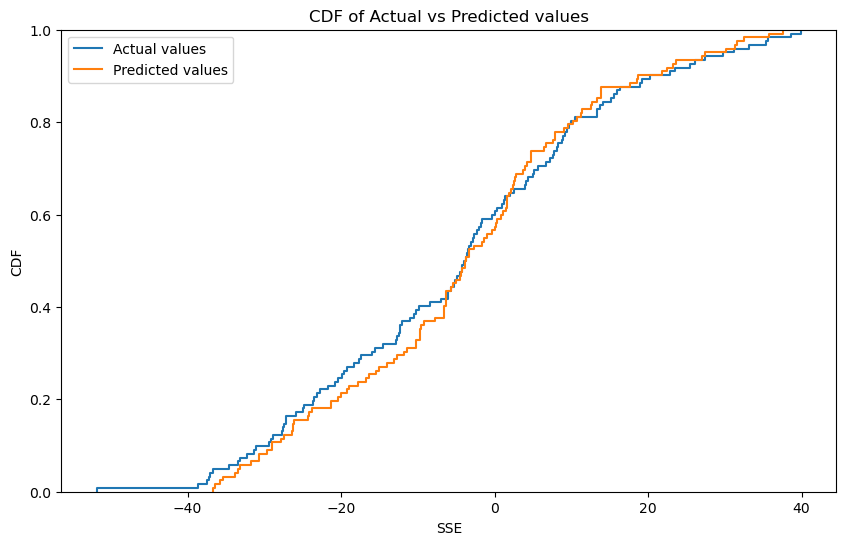

In [39]:
# CDF plot
plt.figure(figsize=(10, 6))
sns.ecdfplot(y_test, label='Actual values')
sns.ecdfplot(pred4, label='Predicted values')
plt.xlabel('SSE')
plt.ylabel('CDF')
plt.title('CDF of Actual vs Predicted values')
plt.legend()
plt.show()


## Parity Plot

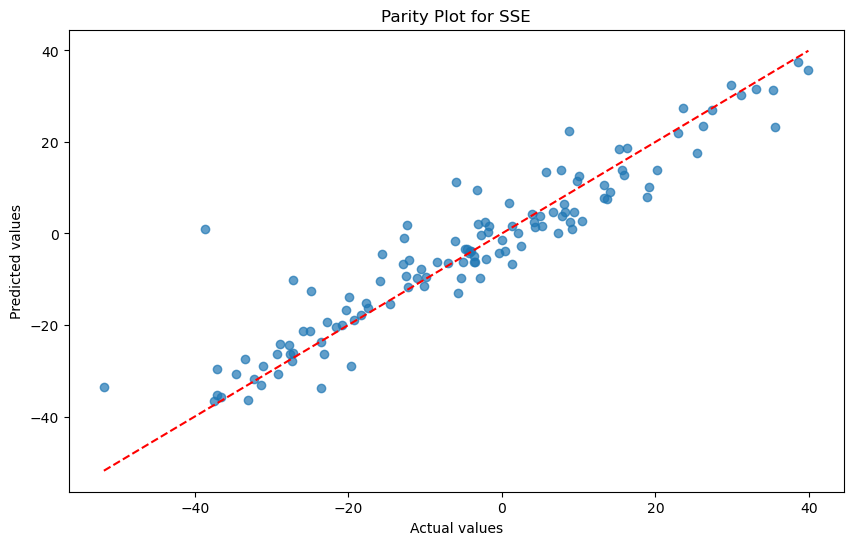

In [40]:
# Parity plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred4, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Parity Plot for SSE')
plt.show()
